In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
dataset[dataset["bmi"].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [7]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace=True)

In [8]:
dataset.groupby("gender").count()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,,,,,,,,,,,
Female,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994,2994
Male,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115,2115
Other,1,1,1,1,1,1,1,1,1,1,1


## Some correlation
Supponiamo di star lavorando con un ospedale e vogliamo predirre se i pazienti avranno un ictus, e abbiamo un dataset dei pazienti li dentro e vogliamo vedere se il dataset è abbastanza buono per predirre l'icuts si o no, secondo delle linee guida date dai medici:

https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

https://www.humanitas.it/malattie/ictus-cerebrale/
Infatti il 75% dei casi di ICTUS colpisce le persone con più di 65 anni.

L’incidenza è proporzionale all’età della popolazione: è bassa fino a 40-45 anni, poi aumenta gradualmente per impennarsi dopo i 70 anni.

Tra i fattori di rischio non modificabili:

età; sesso;

malattie cardiache

obesità

ipertensione arteriosa

In [9]:
def plot_color(values, size=(30,5), coef=1):
    
    my_cmap = plt.get_cmap('copper')
    my_norm = plt.Normalize(vmin=0, vmax=max(values)*coef)
    colormap=my_cmap(my_norm(values))
    
    return colormap

La prima cosa che abbiamo notato nel dataset era la presenza di alcuni valori NaN sulla colonna del bmi. We decide to fill those values with the mean of the bmi of our dataset.

La seconda cosa che abbiamo notato del dataset era la poca quantità di stroke rispetto al totale. Per essere sicuri quindi che questo dataset fosse adatto alle nostre analisi abbiamo controllato se i dati rispecchiassero le analisi cliniche e gli studi sugli stroke.
Dai dati raccolti dal sito del [ministero dell salute italiana](https://www.salute.gov.it/portale/salute/p1_5.jsp?id=28&area=Malattie_cardiovascolari), sappiamo che L’ictus è più frequente dopo i 55 anni, la sua prevalenza raddoppia successivamente ad ogni decade; il 75% degli ictus si verifica nelle persone con più di 65 anni. We also know that body-mass index is a risk factor with the avarange glucose level.

### mostrare scatterplot



Ictus emorragico rappresenta circa il 3%-5% di tutti gli ictus). L’ipertensione è quasi sempre la causa di questa forma gravissima di ictus.

### mostrare grafico ipertensione


#### fonti:

https://jamanetwork.com/journals/jamainternalmedicine/fullarticle/754810
https://www.medicapoliambulatori.it/news/ictus-tipi-cause-sintomi/

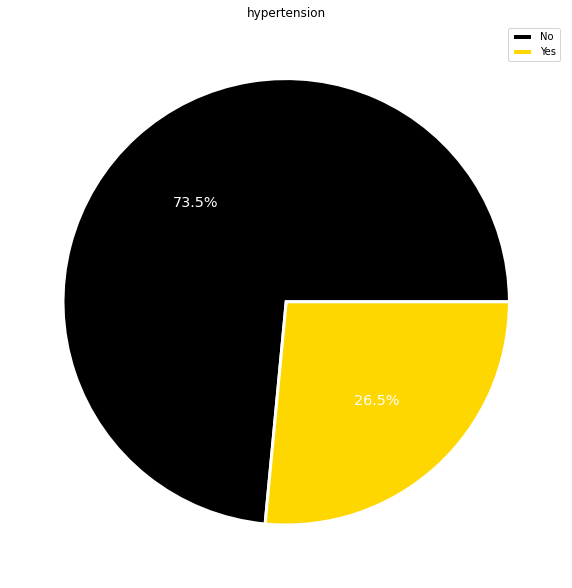

In [10]:
fig, ax = plt.subplots(figsize=(10, 20))



ax.pie(dataset[["hypertension", "stroke", "id"]][dataset.stroke == 1].groupby("hypertension").count()["id"], labels = ["No", "Yes"], 
       colors=["k","gold"], autopct='%1.1f%%', textprops={'size': 'x-large', "color": "w"}, labeldistance=None, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
ax.set_title("hypertension");


ax.legend()
fig.savefig("hypertension_pie.png", bbox_inches='tight', transparent = True)

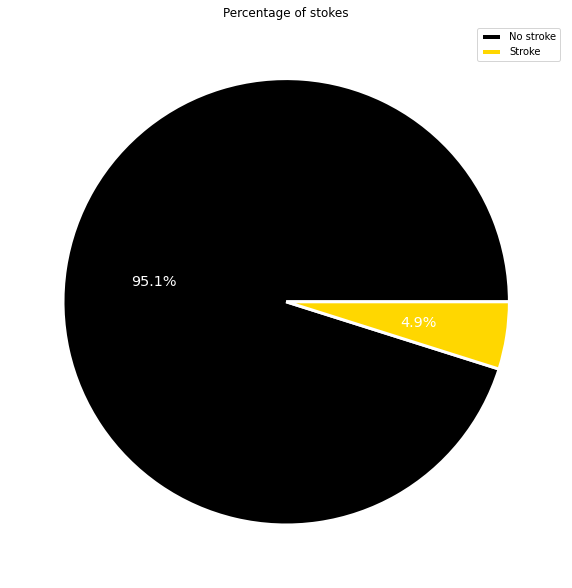

In [11]:
fig, ax = plt.subplots(figsize=(10, 20))

ax.pie(dataset.groupby("stroke").count()["id"], labels = ["No stroke", "Stroke"], 
       colors=["k","gold"], autopct='%1.1f%%', textprops={'size': 'x-large', "color": "w"}, labeldistance=None, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'});
ax.set_title("Percentage of stokes");
ax.legend()
fig.savefig("stroke_pie.png", bbox_inches='tight', transparent = True)

In [12]:
dataset[["hypertension", "stroke", "id"]][dataset.stroke == 1].groupby("hypertension").count()["id"]

hypertension
0    183
1     66
Name: id, dtype: int64

In [13]:
183 + 66

249

In [14]:
max(dataset.avg_glucose_level)

271.74

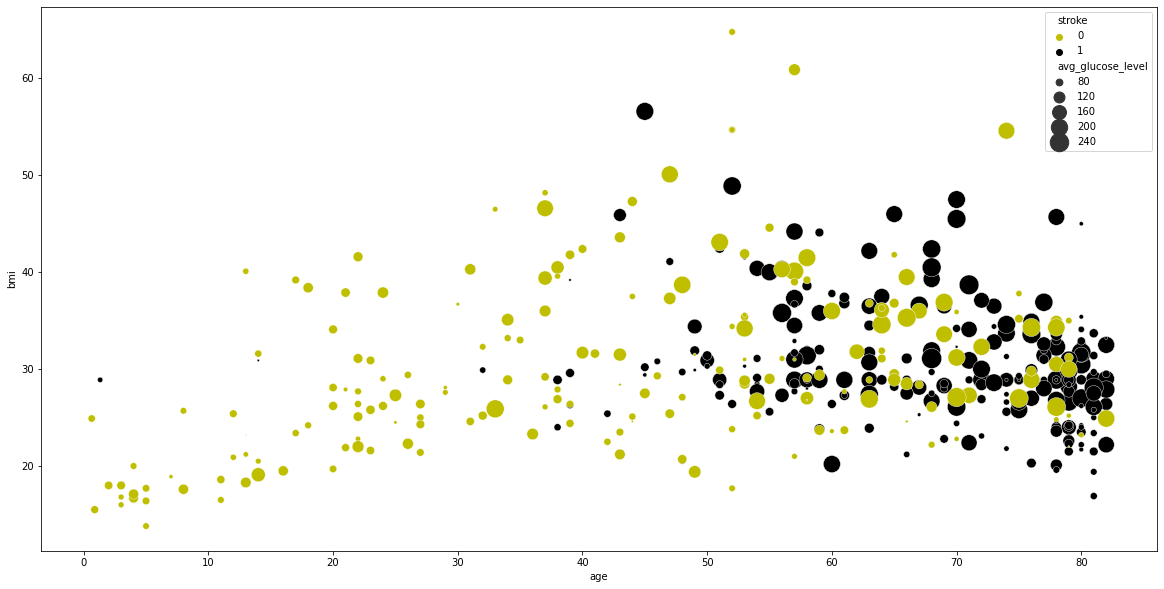

In [15]:
fig, ax = plt.subplots(figsize=(20,10))

stroke1 = dataset[dataset['stroke'] == 1].head(249).copy()
stroke0 = dataset[dataset['stroke'] == 0].head(200).copy()
strokee = pd.concat([stroke1, stroke0])

sns.scatterplot(x = strokee.age, y = strokee.bmi, size=strokee.avg_glucose_level, sizes=(1,400), hue = strokee.stroke, palette = ["y", "k"], ax=ax)


plt.xlabel('age')
plt.ylabel('bmi');
fig.savefig("scatter.png", bbox_inches='tight')

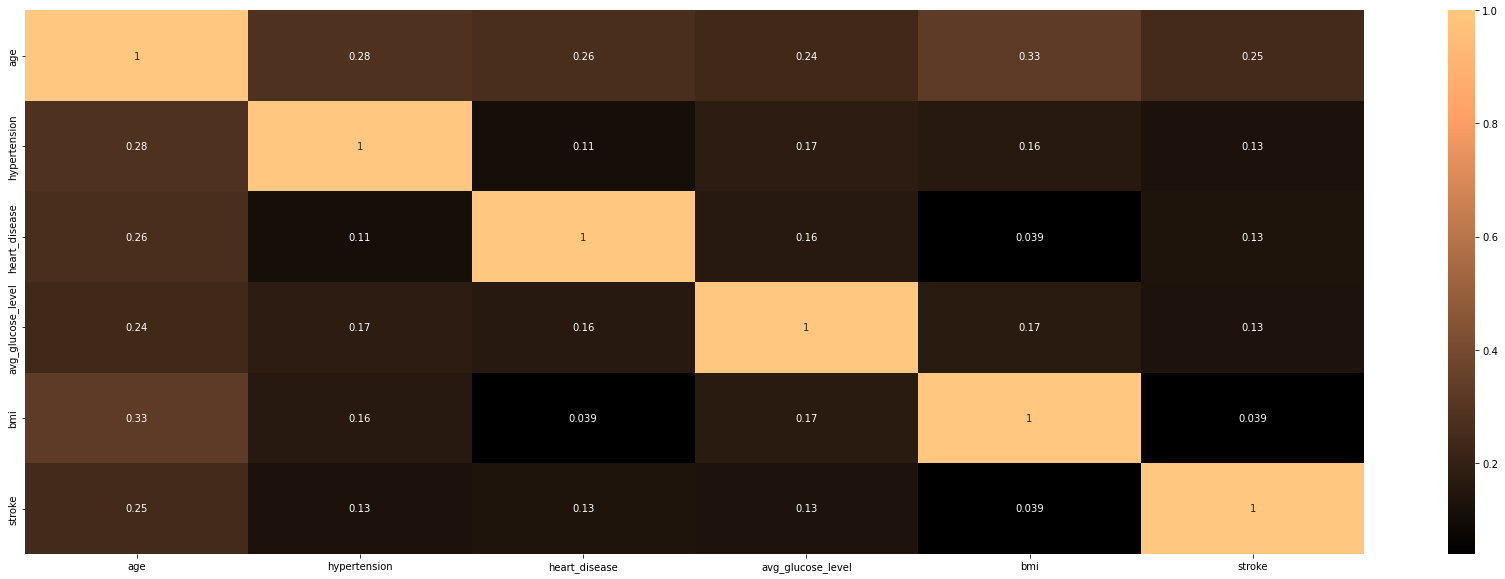

In [16]:
plt.figure(figsize=(30,10))
sns.heatmap(dataset[dataset.columns[1:]].corr(), cmap= "copper", annot=True);

In [17]:
dataset[dataset.columns[1:]].corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


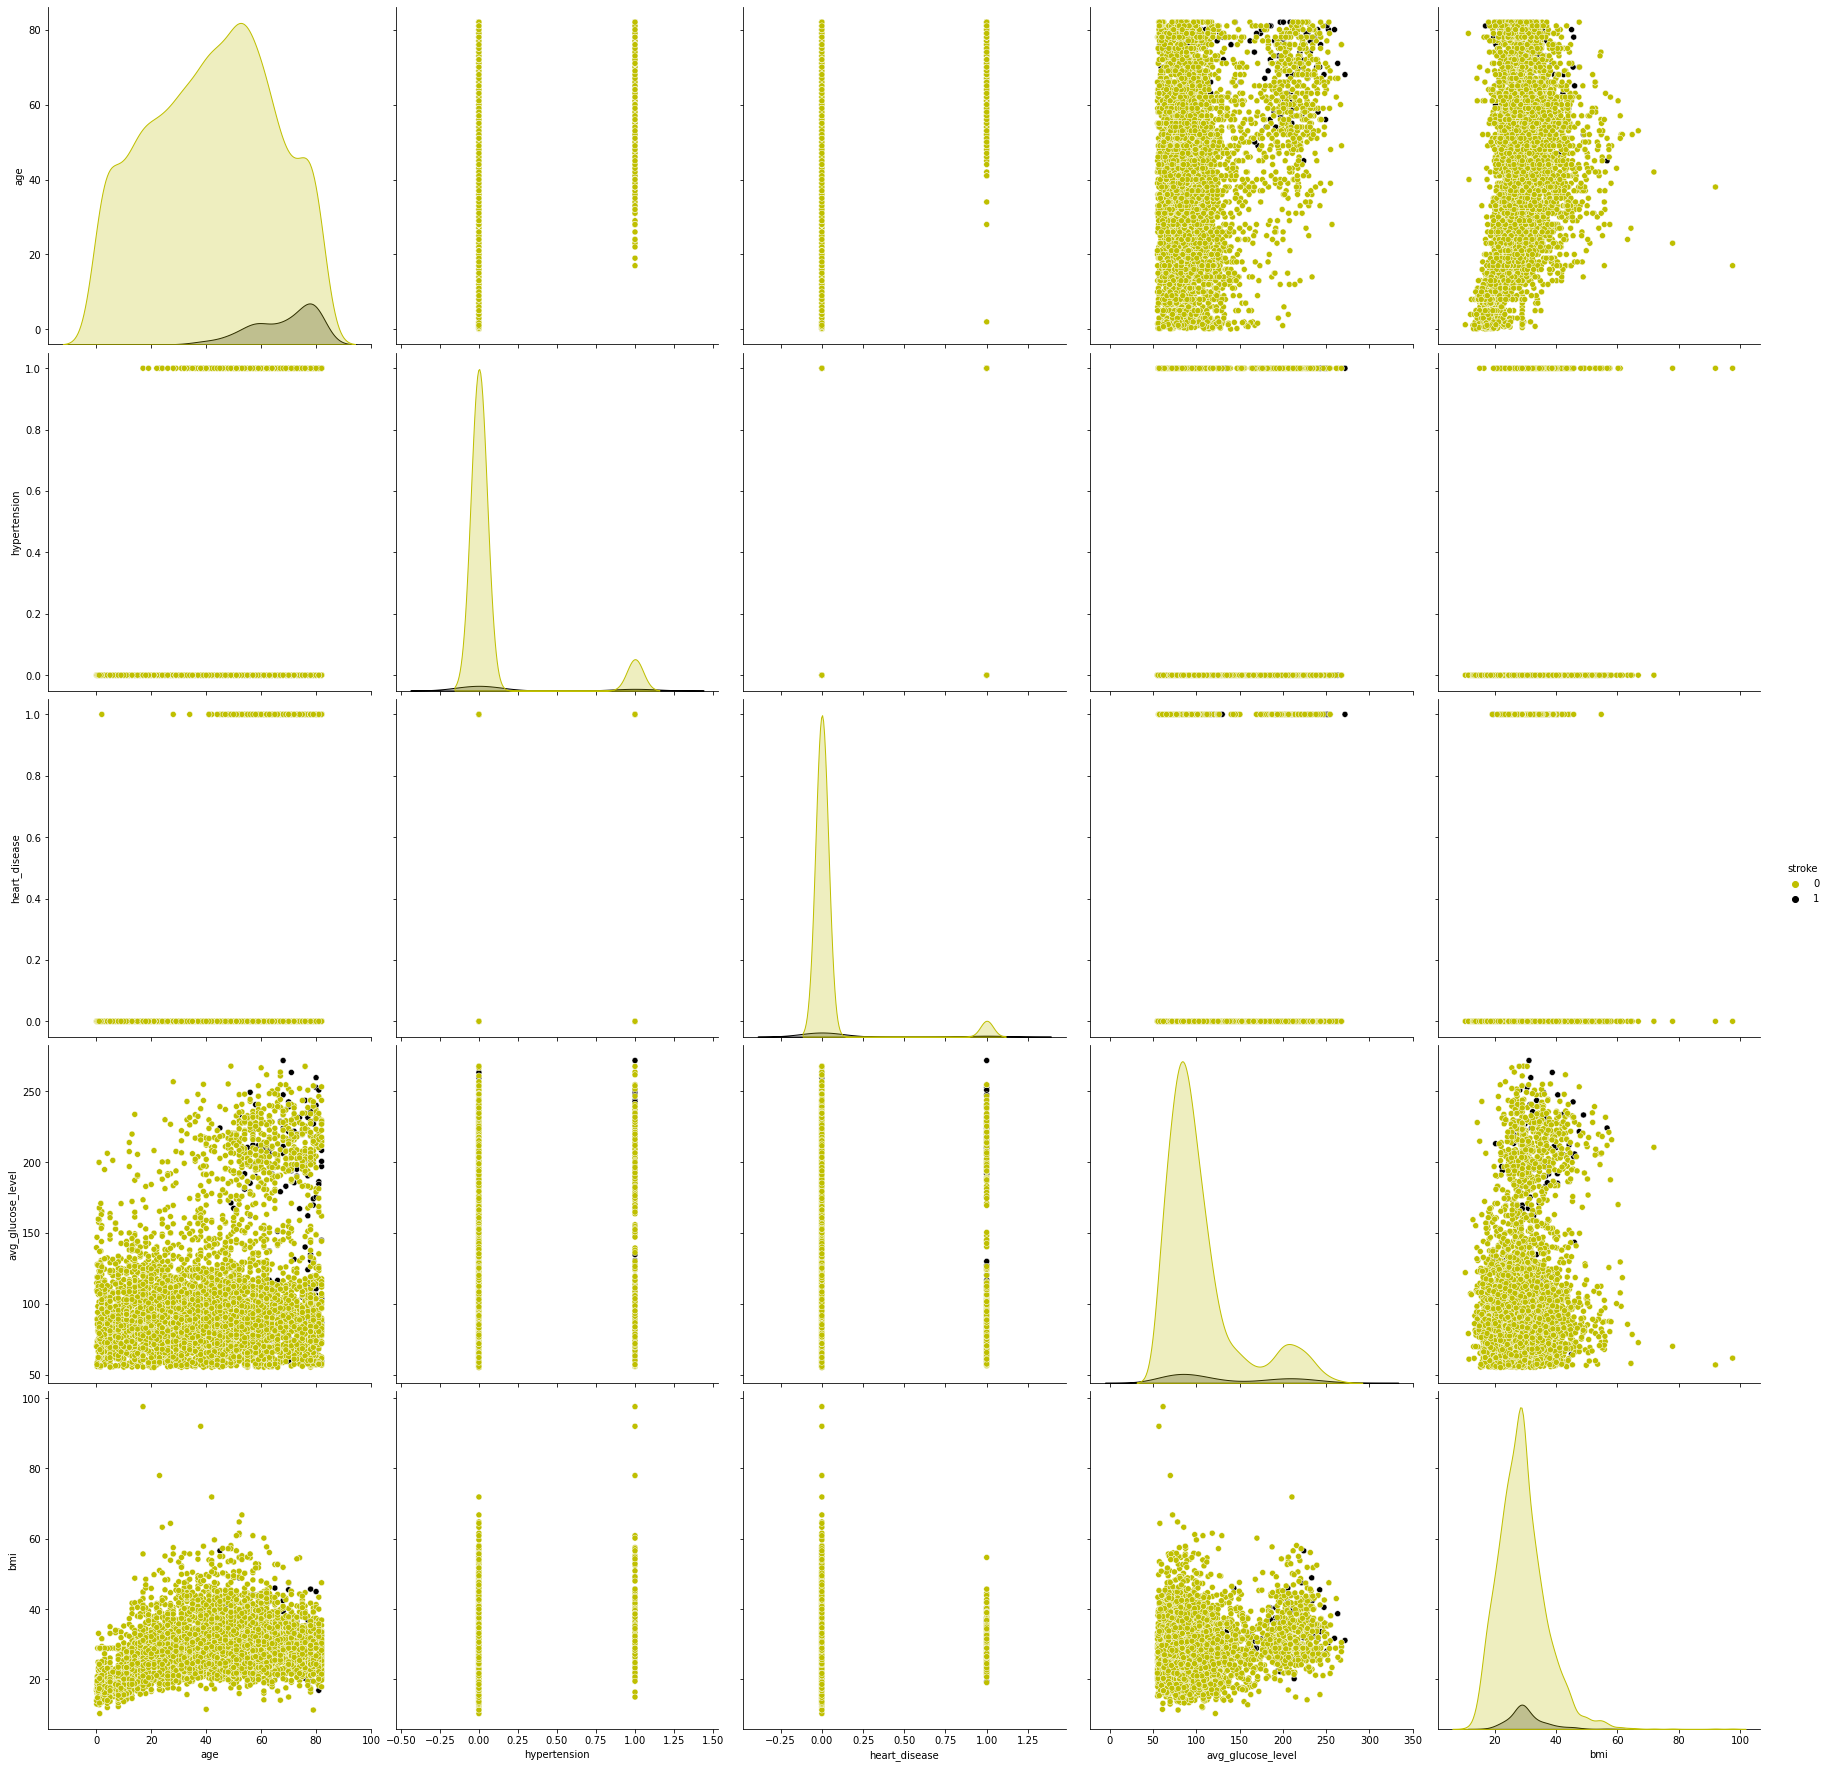

In [18]:
sns.pairplot(dataset[dataset.columns[1:]], hue="stroke", height=5, palette=["y","k"]);

<AxesSubplot:>

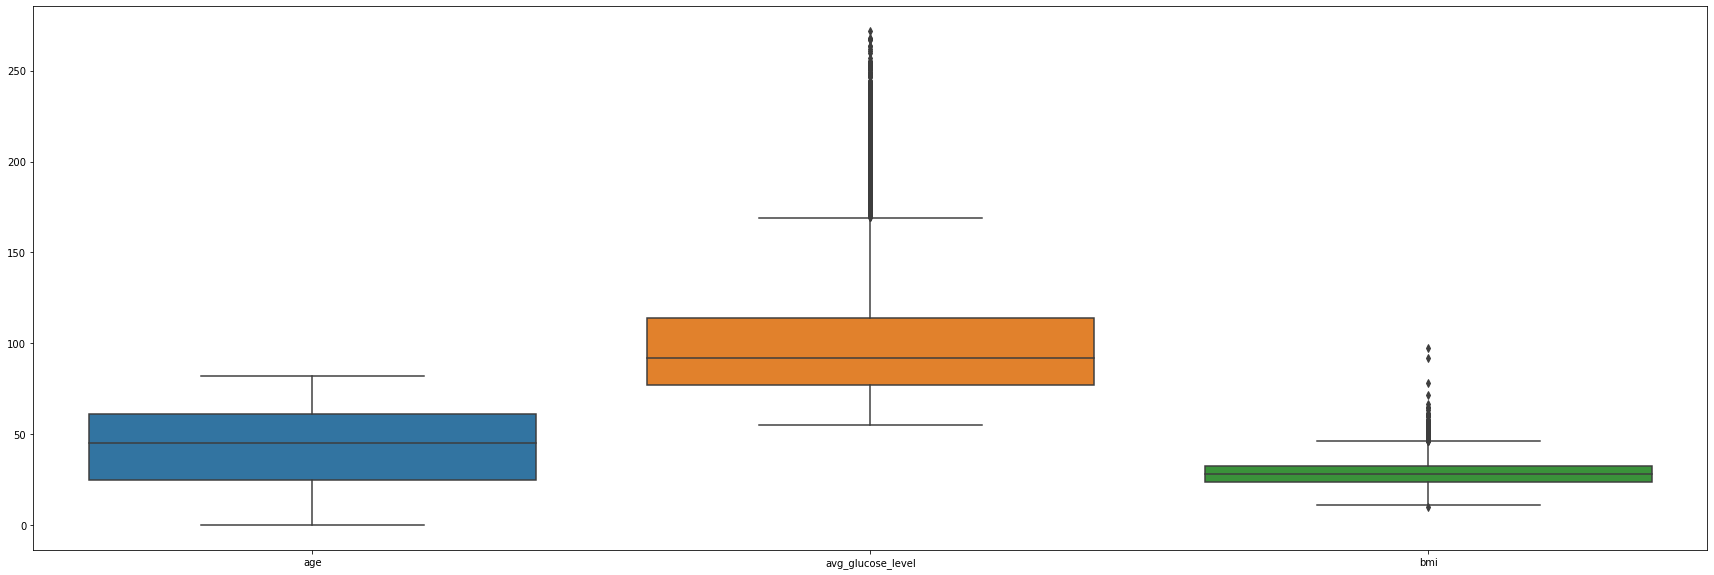

In [19]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(30,10)
sns.boxplot(data=dataset[["age", "avg_glucose_level","bmi"]], ax=ax)

In [20]:
df = dataset

# Standardize my data and fixing it

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [22]:
std = MinMaxScaler()
cols = ['age','avg_glucose_level', 'bmi']
norm = std.fit_transform(df[cols])

df_norm = df.copy()
df_norm[cols] = pd.DataFrame(norm)

In [23]:
df_norm

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,0.816895,0,1,Yes,Private,Urban,0.801265,0.301260,formerly smoked,1
1,51676,Female,0.743652,0,0,Yes,Self-employed,Rural,0.679023,0.212981,never smoked,1
2,31112,Male,0.975586,0,1,Yes,Private,Rural,0.234512,0.254296,never smoked,1
3,60182,Female,0.597168,0,0,Yes,Private,Urban,0.536008,0.276060,smokes,1
4,1665,Female,0.963379,1,0,Yes,Self-employed,Rural,0.549349,0.156930,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,0.975586,1,0,Yes,Private,Urban,0.132167,0.212981,never smoked,0
5106,44873,Female,0.987793,0,0,Yes,Self-employed,Urban,0.323516,0.340206,never smoked,0
5107,19723,Female,0.426270,0,0,Yes,Self-employed,Rural,0.128658,0.232532,never smoked,0
5108,37544,Male,0.621582,0,0,Yes,Private,Rural,0.513203,0.175258,formerly smoked,0


Residence type, ever_married and gender are one hot encoder 0/1, no need to double the columns

In [24]:
# GENDER: F/M --> 1/0
df_norm.drop(df_norm.loc[df['gender'] =='Other'].index, inplace=True)
df_norm["gender"] = df_norm["gender"].apply(lambda x: 1 if x=="Female" else 0)

# EVER_MARRIED: YES/NO --> 1/0
df_norm["ever_married"] = df_norm["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# RESIDENCE_TYPE: URBAN/RURAL --> 1/0
df_norm["Residence_type"] = df_norm["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)

In [43]:
df_norm[df_norm.columns[:-1]]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,9046,0,0.816895,0,1,1,Private,1,0.801265,0.301260,formerly smoked
1,51676,1,0.743652,0,0,1,Self-employed,0,0.679023,0.212981,never smoked
2,31112,0,0.975586,0,1,1,Private,0,0.234512,0.254296,never smoked
3,60182,1,0.597168,0,0,1,Private,1,0.536008,0.276060,smokes
4,1665,1,0.963379,1,0,1,Self-employed,0,0.549349,0.156930,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0.975586,1,0,1,Private,1,0.132167,0.212981,never smoked
5106,44873,1,0.987793,0,0,1,Self-employed,1,0.323516,0.340206,never smoked
5107,19723,1,0.426270,0,0,1,Self-employed,0,0.128658,0.232532,never smoked
5108,37544,0,0.621582,0,0,1,Private,0,0.513203,0.175258,formerly smoked


In [26]:
X = df_norm.drop(['id', 'stroke'], axis = 1)
y = df_norm['stroke']

# Train-Test split

In [27]:
from sklearn.model_selection import train_test_split
# split the data with 60% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,
                                  train_size = 0.6)

In [28]:
# transform the dataframe in dictionary to perform feature extraction
X_train = X_train.to_dict('records')
X_test = X_test.to_dict('records')

In [29]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse = False, dtype = float)

In [30]:
X_train = v.fit_transform(X_train)
X_test = v.transform(X_test)

In [31]:
pd.DataFrame(X_train, columns = v.get_feature_names_out() )

,Residence_type,age,avg_glucose_level,bmi,ever_married,gender,heart_disease,hypertension,smoking_status=Unknown,smoking_status=formerly smoked,smoking_status=never smoked,smoking_status=smokes,work_type=Govt_job,work_type=Never_worked,work_type=Private,work_type=Self-employed,work_type=children
0,1.0,0.009766,0.263457,0.098511,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.670410,0.812621,0.137457,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.768066,0.550780,0.160367,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.890137,0.056597,0.257732,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.853516,0.476456,0.265750,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,1.0,0.340820,0.145370,0.324170,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3061,0.0,0.743652,0.123904,0.224513,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3062,0.0,0.536133,0.182762,0.207331,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3063,1.0,0.255371,0.303850,0.222222,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [33]:
clf = LogisticRegression(solver="liblinear")

In [34]:
clf.fit(X_train, y_train)
y_LR = clf.predict(X_test)

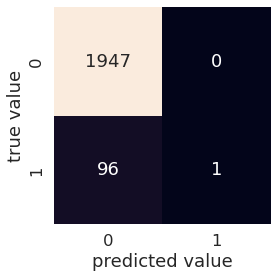

In [35]:
mat = confusion_matrix(y_test, y_LR)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [36]:
accuracy_score(y_test, y_LR)

0.9530332681017613

In [37]:
y_LR

array([0, 0, 0, ..., 0, 0, 0])

# NAIVE BAYES

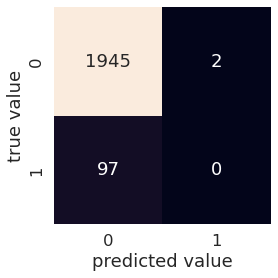

In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
y_pred = clf.fit(X_train, y_train)
y_MNB = clf.predict(X_test)

mat = confusion_matrix(y_test, y_MNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [39]:
accuracy_score(y_test, y_MNB)

0.9515655577299413

# GNB

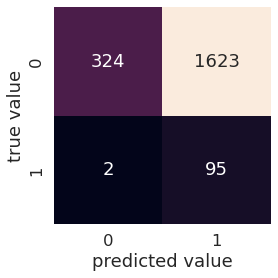

In [40]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
y_GNB = gnb.predict(X_test)

mat = confusion_matrix(y_test, y_GNB)

sns.set(font_scale=1.5) 
sns.heatmap(mat, square = True, annot=True, cbar=False, fmt="d")
plt.xlabel('predicted value')
plt.ylabel('true value');

In [41]:
accuracy_score(y_test, y_GNB)

0.20499021526418787